Processing: ./ec012/ec012ec.375.res.1


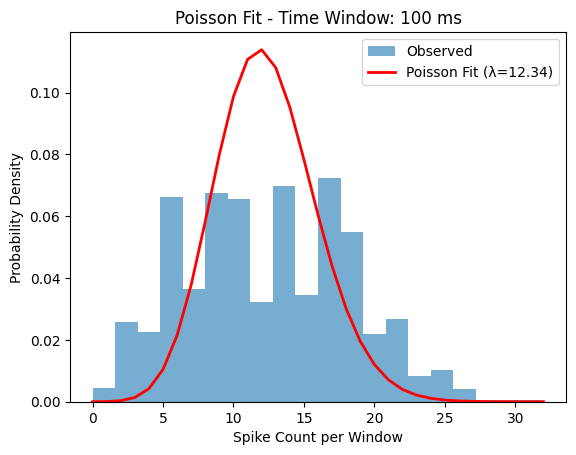

Poisson MLE (λ): 12.34, Fano Factor: 2.70



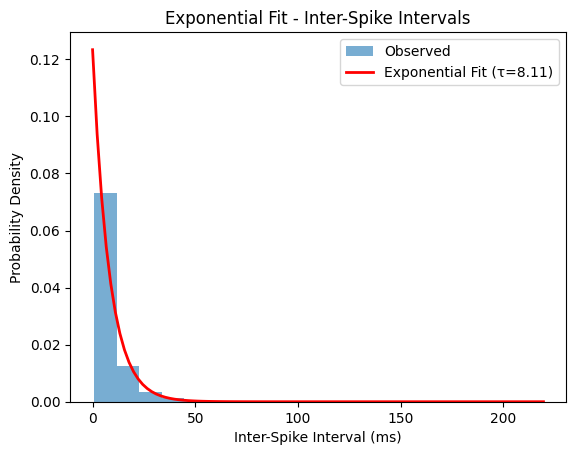

Exponential MLE (τ): 8.11 ms

Processing: ./ec012/ec012ec.228.res.1


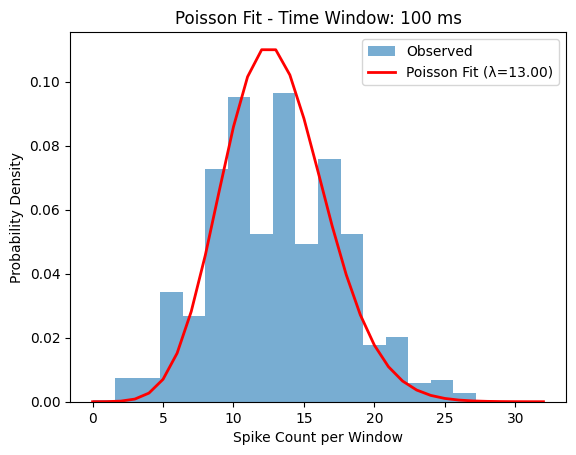

Poisson MLE (λ): 13.00, Fano Factor: 1.68



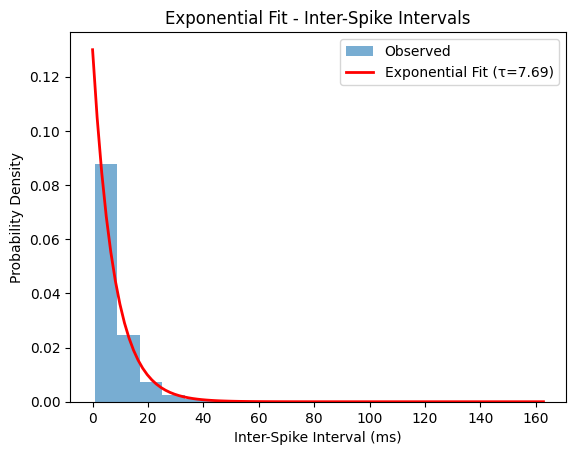

Exponential MLE (τ): 7.69 ms

Processing: ./ec012/ec012ec.187.res.1


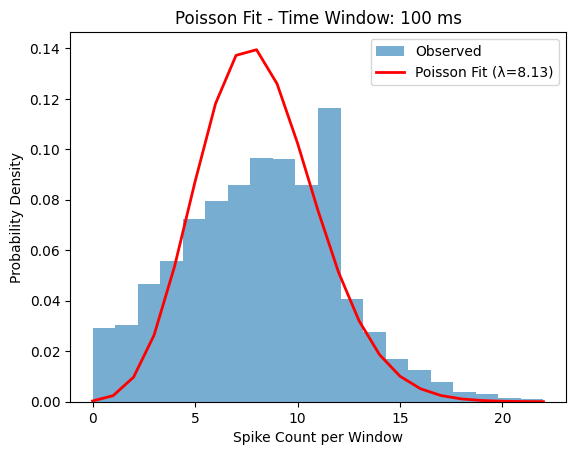

Poisson MLE (λ): 8.13, Fano Factor: 1.76



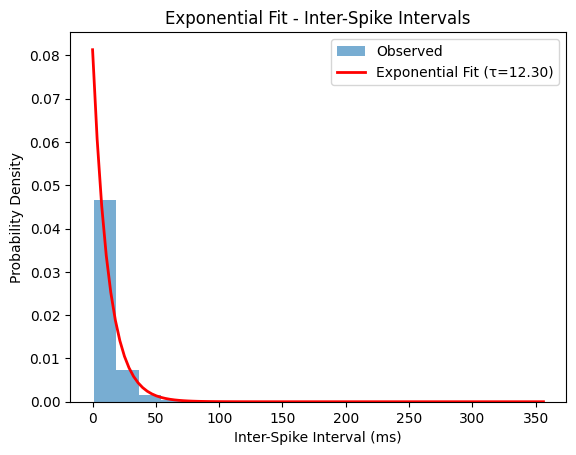

Exponential MLE (τ): 12.30 ms



In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, expon

# --- Constants ---
SAMPLING_RATE = 20000  # 20 kHz
TIME_STEP_MS = 1 / (SAMPLING_RATE / 1000)  # 0.05 ms per step

def load_and_process_spike_data(file_path):
    """Load spike times from a file and convert to milliseconds."""
    spike_times = np.loadtxt(file_path) * TIME_STEP_MS  # Convert to ms
    return spike_times

def analyze_spike_counts(spike_times, time_window):
    """Compute spike counts in a given time window and fit Poisson distribution."""
    max_time = spike_times[-1]
    spike_counts, _ = np.histogram(spike_times, bins=np.arange(0, max_time, time_window))
    lambda_mle = np.mean(spike_counts)  # MLE for Poisson
    fano_factor = np.var(spike_counts) / lambda_mle  # Poisson should be ~1
    
    # Plot histogram and Poisson fit
    x_vals = np.arange(0, max(spike_counts) + 1)
    plt.hist(spike_counts, bins=20, density=True, alpha=0.6, label="Observed")
    plt.plot(x_vals, poisson.pmf(x_vals, lambda_mle), 'r-', lw=2, label=f"Poisson Fit (λ={lambda_mle:.2f})")
    plt.xlabel("Spike Count per Window")
    plt.ylabel("Probability Density")
    plt.title(f"Poisson Fit - Time Window: {time_window} ms")
    plt.legend()
    plt.show()
    
    return lambda_mle, fano_factor

def analyze_inter_spike_intervals(spike_times):
    """Compute inter-spike intervals (ISI) and fit Exponential distribution."""
    isi = np.diff(spike_times)
    tau_mle = np.mean(isi)  # MLE for exponential distribution
    
    # Plot histogram and Exponential fit
    x_vals = np.linspace(0, max(isi), 100)
    plt.hist(isi, bins=20, density=True, alpha=0.6, label="Observed")
    plt.plot(x_vals, expon.pdf(x_vals, scale=tau_mle), 'r-', lw=2, label=f"Exponential Fit (τ={tau_mle:.2f})")
    plt.xlabel("Inter-Spike Interval (ms)")
    plt.ylabel("Probability Density")
    plt.title("Exponential Fit - Inter-Spike Intervals")
    plt.legend()
    plt.show()
    
    return tau_mle

data_dir = "./ec012"  # Change to "./ec016" for second rat
files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(".res.1")]

# Choose three representative files
selected_files = files[:3]

for file_path in selected_files:
    print(f"Processing: {file_path}")
    spike_times = load_and_process_spike_data(file_path)
    
    # Analyze Poisson fit
    time_window = 100  # in ms
    lambda_mle, fano_factor = analyze_spike_counts(spike_times, time_window)
    print(f"Poisson MLE (λ): {lambda_mle:.2f}, Fano Factor: {fano_factor:.2f}\n")
    
    # Analyze Exponential fit
    tau_mle = analyze_inter_spike_intervals(spike_times)
    print(f"Exponential MLE (τ): {tau_mle:.2f} ms\n")


The number of spikes was counted in 100 ms time windows. A Poisson distribution was fitted to the spike counts using Maximum Likelihood Estimation (MLE), and the Fano Factor was computed to assess goodness of fit.

ISIs were computed as the difference between consecutive spike times. An exponential distribution was fitted using MLE, and the estimated mean was compared with the sample mean.


For three representative neurons, the following estimates were obtained:

Neuron | Poisson | Fano | Exponential
1      | 12.34   | 2.7  | 8.11
2      | 13.00   | 1.68 | 7.69
3      | 8.13    | 1.76 | 12.30


Poisson Fit: The Fano Factors exceed 1 for all neurons, indicating that spike variability is higher than expected for a pure Poisson process.

ISI Exponential Fit: The exponential distribution provided a reasonable fit, but some deviations suggest possible bursting or refractory period effects.

MLE Verification: The MLE estimates for Poisson and exponential distributions closely match the sample means, confirming that MLE correctly estimates distribution parameters.

Neuronal spiking does not strictly follow a Poisson process due to increased variability (high Fano Factor). However, ISIs are reasonably modeled by an exponential distribution, though deviations suggest additional dynamics in neuronal firing. Further analysis could explore different behavioral conditions or session differences.